<a href="https://colab.research.google.com/github/rvprieto/Projeto-Day6-DataExpert/blob/main/Day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #dataframes
import numpy as np #arrays
import matplotlib.pyplot as plt #graficos
import seaborn as sns #graficos 2
import datetime as dt
from google.colab import files #importar dados para o pandas
from google.colab import drive

In [2]:
df_feature = pd.read_csv('/content/features.csv')
df_store = pd.read_csv('/content/stores.csv')
df_train = pd.read_csv('/content/train.csv')


In [3]:
df_feature.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df_feature.shape

(8190, 12)

In [5]:
df_store.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
df_store.shape

(45, 3)

In [7]:
df_train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_train.shape

(421570, 5)

In [9]:
df_1 = df_feature.merge(df_store, on='Store')
df_full = df_1.merge(df_train, on=['Store','Date']) 

In [10]:
df_full.sample(20)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales,IsHoliday_y
134471,14,2011-11-04,43.92,3.551,NaN,NaN,NaN,NaN,NaN,187.970363,8.523,False,A,200898,10,23190.96,False
276362,28,2012-08-17,94.87,4.002,5349.52,1.98,11.24,2542.17,6620.24,130.790968,10.926,False,A,206302,52,1796.58,False
166432,17,2012-08-03,72.94,3.512,13721.83,56.60,8.34,12343.79,1797.84,130.737871,5.936,False,B,93188,11,15235.46,False
44837,5,2011-08-19,89.35,3.554,NaN,NaN,NaN,NaN,NaN,216.231186,6.529,False,B,34875,31,1954.88,False
304643,32,2010-04-23,50.06,2.776,NaN,NaN,NaN,NaN,NaN,189.619006,8.963,False,A,203007,10,17668.79,False
253750,26,2011-12-30,18.80,3.402,4124.23,34472.24,159.04,799.85,2194.68,136.643258,7.598,True,A,152513,55,22539.29,True
282901,29,2011-10-07,56.44,3.633,NaN,NaN,NaN,NaN,NaN,136.472000,9.357,False,B,93638,79,7888.13,False
216490,22,2012-09-28,62.17,4.018,4269.80,23.73,1.72,2763.63,2130.39,142.765750,7.753,False,B,119557,16,6831.35,False
207104,21,2012-10-26,70.50,3.506,7477.80,24.95,206.50,754.69,2667.13,223.078337,6.170,False,B,140167,46,16432.01,False
44124,5,2011-05-27,80.14,3.786,NaN,NaN,NaN,NaN,NaN,216.070408,6.489,False,B,34875,96,6316.47,False


In [11]:
df_full['IsHoliday_x'].value_counts()

False    391909
True      29661
Name: IsHoliday_x, dtype: int64

In [12]:
df_full['IsHoliday_y'].value_counts()

False    391909
True      29661
Name: IsHoliday_y, dtype: int64

In [13]:
df_full.drop(columns='IsHoliday_y', inplace=True)

In [14]:
df_full.shape

(421570, 16)

In [15]:
df_full.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [16]:
df_full['MarkDown1'].value_counts()

1.50       102
460.73     102
175.64      93
686.24      75
9264.48     75
          ... 
243.47      42
318.51      42
945.96      42
187.88      42
512.15      42
Name: MarkDown1, Length: 2277, dtype: int64

In [17]:
df_full['Date'] = pd.to_datetime(df_full['Date'], format='%Y-%m-%d')

In [18]:
df_full['Date'].value_counts()

2011-12-23    3027
2011-11-25    3021
2011-12-16    3013
2011-12-09    3010
2012-02-17    3007
              ... 
2010-07-09    2903
2010-07-16    2901
2010-08-20    2901
2010-08-27    2898
2010-08-13    2896
Name: Date, Length: 143, dtype: int64

In [19]:
df_train.nunique() 

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [20]:
df_full['Type'] = df_full.Type.astype('category')

In [21]:
df_full['Dept'] = df_full.Dept.astype('category')

In [22]:
df_full['Store'] = df_full.Store.astype('category')

In [23]:
df_full.corr()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Size,Weekly_Sales
Temperature,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.155949,-0.058313,-0.002312
Fuel_Price,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,-0.078281,0.003361,-0.000120
MarkDown1,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,-0.035586,0.345673,0.085251
MarkDown2,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.334818,0.108827,0.024130
MarkDown3,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.427960,0.048913,0.060385
MarkDown4,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,-0.000562,0.168196,0.045414
MarkDown5,-0.017544,-0.128065,0.160257,-0.007440,-0.026467,0.107792,1.000000,0.060630,-0.003843,-0.053719,0.304575,0.090362
CPI,0.182112,-0.164210,-0.055558,-0.039534,-0.023590,-0.049628,0.060630,1.000000,-0.299953,-0.001944,-0.003314,-0.020921
Unemployment,0.096730,-0.033853,0.050285,0.020940,0.012818,0.024963,-0.003843,-0.299953,1.000000,0.010460,-0.068238,-0.025864
IsHoliday_x,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,1.000000,0.000593,0.012774


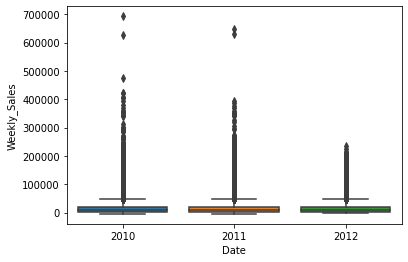

In [24]:
sns.boxplot(x=df_full['Date'].dt.year, y=df_full["Weekly_Sales"])

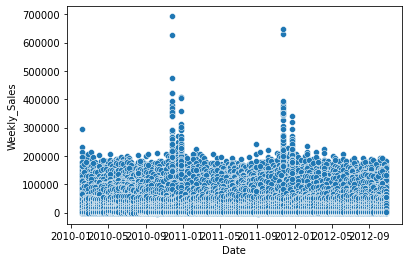

In [25]:
sns.scatterplot(x=df_full['Date'], y=df_full["Weekly_Sales"])

In [26]:
df_full.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


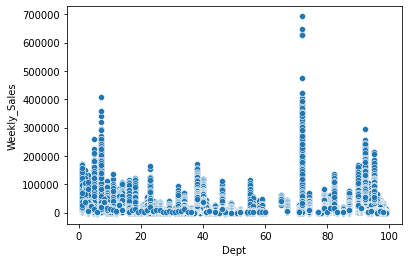

In [27]:
sns.scatterplot(x=df_full['Dept'], y=df_full["Weekly_Sales"])

In [28]:
df_full[["MarkDown1",	"MarkDown2",	'MarkDown3'	,'MarkDown4',	"MarkDown5"]]= df_full[["MarkDown1",	"MarkDown2",	'MarkDown3'	,'MarkDown4',	"MarkDown5"]].fillna(0)

In [29]:
df_full.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38


In [30]:
df_full['IsHoliday_x'] = df_full.IsHoliday_x.astype('int64')

In [31]:
df_full = pd.get_dummies(df_full, columns=['Store',"Type","Dept"])

In [32]:
df_s = df_full.sample(1000)

In [33]:
df_s.shape

(1000, 142)

In [34]:
x_s = df_s.drop(columns=['Date',"Weekly_Sales"])

In [35]:
x_s.shape

(1000, 140)

In [36]:
y_s = df_s['Weekly_Sales']

In [37]:
y_s.shape

(1000,)

In [38]:
from sklearn.model_selection import train_test_split 

x_s_train, x_s_test, y_s_train, y_s_test = train_test_split(x_s, y_s, test_size=0.2, random_state=13 ) 

In [39]:
from sklearn.preprocessing import StandardScaler

colunas = ['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']

scaler = StandardScaler()
scaler.fit(x_s_train[colunas])


x_s_train = x_s_train.reset_index().drop('index',axis=1)
x_s_test = x_s_test.reset_index().drop('index',axis=1)  

x_s_train_scaled = scaler.transform(x_s_train[colunas])
x_s_test_scaled = scaler.transform(x_s_test[colunas])

# Transformand para dataframe para visualização
x_s_train[colunas] = pd.DataFrame(x_s_train_scaled,columns =colunas)
x_s_test[colunas] = pd.DataFrame(x_s_test_scaled,columns = colunas) 

In [40]:
x_s_train.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Size,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,...,Dept_43,Dept_44,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,-0.252657,0.033686,10.046240,0.960033,-0.077586,9.632744,2.126181,1.196899,-0.481502,0,1.100233,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.223751,-1.290530,-0.367818,-0.178161,-0.108905,-0.254375,-0.489261,0.458202,-0.335675,0,1.001309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.124944,1.617331,-0.367818,-0.178161,-0.108905,-0.254375,-0.489261,0.347935,0.286451,0,1.076948,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.711375,1.533863,-0.367818,-0.178161,-0.108905,-0.254375,-0.489261,-0.833625,-0.131098,0,1.131252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.162865,1.206757,-0.367818,-0.178161,-0.108905,-0.254375,-0.489261,-0.901764,-0.109066,0,0.277342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
x_s_test.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Size,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,...,Dept_43,Dept_44,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,-1.145656,-1.798108,-0.367818,-0.178161,-0.108905,-0.254375,-0.489261,0.973309,0.183113,1,1.100233,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.672452,1.542886,-0.134117,-0.178161,-0.106946,-0.133255,1.753225,-0.832344,-2.009015,0,0.319813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.772327,0.509682,0.153417,-0.116621,-0.088976,-0.145633,1.372588,-0.893674,-1.864762,0,-0.350312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-0.972077,1.290225,1.987057,3.810987,-0.107547,1.436732,2.697494,-0.772418,0.017877,0,1.131252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.647101,1.051099,-0.358212,-0.178161,-0.106348,-0.254375,-0.364827,-1.036912,-0.422227,0,-1.587160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_s_train, y_s_train)

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error

y_s_pred = reg.predict(x_s_test)


a = mean_absolute_error(y_s_test, y_s_pred)
b = r2_score(y_s_test, y_s_pred)
c = mean_squared_error(y_s_test, y_s_pred)
metricas = {}
metricas["LinearRegression"]={
                            "R2":b,
                            "MAE": a,
'MSE': c} 
print(metricas)

{'LinearRegression': {'R2': -7.664994414972994e+21, 'MAE': 200293268339148.62, 'MSE': 4.011739335316282e+30}}


In [44]:
from sklearn.linear_model import SGDRegressor



In [45]:
sgd = SGDRegressor().fit(x_s_train, y_s_train)

In [46]:
y_s_pred = sgd.predict(x_s_test)

In [47]:
a = mean_absolute_error(y_s_test, y_s_pred)
b = r2_score(y_s_test, y_s_pred)
c = mean_squared_error(y_s_test, y_s_pred)
metricas["SGD"]={
                            "R2":b,
                            "MAE": a,
'MSE': c} 
print(metricas)

{'LinearRegression': {'R2': -7.664994414972994e+21, 'MAE': 200293268339148.62, 'MSE': 4.011739335316282e+30}, 'SGD': {'R2': 0.5479301474141965, 'MAE': 9754.676818261052, 'MSE': 236606357.6493148}}


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(random_state=13).fit(x_s_train, y_s_train)



In [49]:
y_s_pred = grad.predict(x_s_test)

a = mean_absolute_error(y_s_test, y_s_pred)
b = r2_score(y_s_test, y_s_pred)
c = mean_squared_error(y_s_test, y_s_pred)
metricas["GBR"]={
                            "R2":b,
                            "MAE": a,
'MSE': c} 
print(metricas)

{'LinearRegression': {'R2': -7.664994414972994e+21, 'MAE': 200293268339148.62, 'MSE': 4.011739335316282e+30}, 'SGD': {'R2': 0.5479301474141965, 'MAE': 9754.676818261052, 'MSE': 236606357.6493148}, 'GBR': {'R2': 0.6035669449691168, 'MAE': 9326.689020868193, 'MSE': 207486919.70085433}}


In [50]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(random_state=13).fit(x_s_train, y_s_train)

In [51]:
y_s_pred = etr.predict(x_s_test)

a = mean_absolute_error(y_s_test, y_s_pred)
b = r2_score(y_s_test, y_s_pred)
c = mean_squared_error(y_s_test, y_s_pred)
metricas["ETR"]={
                            "R2":b,
                            "MAE": a,
'MSE': c} 
print(metricas)

{'LinearRegression': {'R2': -7.664994414972994e+21, 'MAE': 200293268339148.62, 'MSE': 4.011739335316282e+30}, 'SGD': {'R2': 0.5479301474141965, 'MAE': 9754.676818261052, 'MSE': 236606357.6493148}, 'GBR': {'R2': 0.6035669449691168, 'MAE': 9326.689020868193, 'MSE': 207486919.70085433}, 'ETR': {'R2': 0.7123870752049203, 'MAE': 6137.4836430000005, 'MSE': 150532149.311403}}


In [52]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor(random_state=13).fit(x_s_train, y_s_train)

In [53]:
y_s_pred = random.predict(x_s_test)

a = mean_absolute_error(y_s_test, y_s_pred)
b = r2_score(y_s_test, y_s_pred)
c = mean_squared_error(y_s_test, y_s_pred)
metricas["Random"]={
                            "R2":b,
                            "MAE": a,
'MSE': c} 
print(metricas)

{'LinearRegression': {'R2': -7.664994414972994e+21, 'MAE': 200293268339148.62, 'MSE': 4.011739335316282e+30}, 'SGD': {'R2': 0.5479301474141965, 'MAE': 9754.676818261052, 'MSE': 236606357.6493148}, 'GBR': {'R2': 0.6035669449691168, 'MAE': 9326.689020868193, 'MSE': 207486919.70085433}, 'ETR': {'R2': 0.7123870752049203, 'MAE': 6137.4836430000005, 'MSE': 150532149.311403}, 'Random': {'R2': 0.691261472635948, 'MAE': 7263.512848, 'MSE': 161588962.4308818}}


In [54]:
from sklearn.linear_model import HuberRegressor 

huber = HuberRegressor().fit(x_s_train, y_s_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [55]:
y_s_pred = huber.predict(x_s_test)

a = mean_absolute_error(y_s_test, y_s_pred)
b = r2_score(y_s_test, y_s_pred)
c = mean_squared_error(y_s_test, y_s_pred)
metricas["huber"]={
                            "R2":b,
                            "MAE": a,
'MSE': c} 
print(metricas)

{'LinearRegression': {'R2': -7.664994414972994e+21, 'MAE': 200293268339148.62, 'MSE': 4.011739335316282e+30}, 'SGD': {'R2': 0.5479301474141965, 'MAE': 9754.676818261052, 'MSE': 236606357.6493148}, 'GBR': {'R2': 0.6035669449691168, 'MAE': 9326.689020868193, 'MSE': 207486919.70085433}, 'ETR': {'R2': 0.7123870752049203, 'MAE': 6137.4836430000005, 'MSE': 150532149.311403}, 'Random': {'R2': 0.691261472635948, 'MAE': 7263.512848, 'MSE': 161588962.4308818}, 'huber': {'R2': 0.5011262422036478, 'MAE': 8402.933574792103, 'MSE': 261102796.57858375}}


In [56]:
resumo = pd.DataFrame.from_dict(metricas, orient='index') 

In [57]:
resumo

,R2,MAE,MSE
LinearRegression,-7.664994e+21,2.002933e+14,4.011739e+30
SGD,5.479301e-01,9.754677e+03,2.366064e+08
GBR,6.035669e-01,9.326689e+03,2.074869e+08
ETR,7.123871e-01,6.137484e+03,1.505321e+08
Random,6.912615e-01,7.263513e+03,1.615890e+08
huber,5.011262e-01,8.402934e+03,2.611028e+08


In [58]:
x = df_full.drop(columns=['Date',"Weekly_Sales"])

In [59]:
y = df_full['Weekly_Sales']

In [60]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13 ) 

In [61]:
colunas = ['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']

scaler = StandardScaler()
scaler.fit(x_train[colunas])


x_train = x_train.reset_index().drop('index',axis=1)
x_test = x_test.reset_index().drop('index',axis=1)  

x_train_scaled = scaler.transform(x_train[colunas])
x_test_scaled = scaler.transform(x_test[colunas])

# Transformand para dataframe para visualização
x_train[colunas] = pd.DataFrame(x_train_scaled,columns =colunas)
x_test[colunas] = pd.DataFrame(x_test_scaled,columns = colunas) 

In [69]:
etr_full = ExtraTreesRegressor()
params_grid = {'n_estimators':(50,100,150),
          'criterion':('squared_error', 'mse', 'absolute_error', 'mae')
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=etr_full, param_grid=params_grid, n_jobs=-1, cv=3, verbose=0)

grid_search.fit(x_train, y_train)